In [1]:
import numpy as np
import wurtzite as wzt
import matplotlib.pyplot as plt
import matplotlib

### Method and discussion:

Zakladamy tutaj nastepujace rownania Love'a:

$u_x = \frac{b_x}{2\pi}[arctg(\frac{y}{x}) + \frac{xy}{2(1-\nu)(x^2 + y^2)}]$

$u_y = -\frac{b_x}{2\pi}[\frac{1-2\nu}{4(1-\nu)}ln\frac{x^2+y^2}{r_o^2} + \frac{x^2-y^2}{4(1-\nu)(x^2+y^2)}]$

$u_z = \frac{bz}{2\pi}arctg(\frac{y}{x})$

Rozumiem, że istnieją **założenia** co do tego, kiedy dane równanie może być zaaplikowane, np. że każda płaszczyzna krystalograficzna jest "płaska".

Założenia te nie są spełnione po zaaplikowaniu pierwszej dyslokacji. Możemy więc spróbować przekształcić siatkę po pierwszej dyslokacji do nowej "przestrzeni", w której te założenia będą już spełnione.

Dla uproszczenia dalszej analizy przyjmijmy przez chwilę, że warunek "płaszczyzna krystalograficzna jest "płaska"" oznacza, że wszystkie punkty na tej samej płaszczyźnie krystalograficznej mają taką samą współrzędną $y$.

Możemy więc przyjąć następującą strategię ($\mathbf{x} = (x, y, z)$, $\mathbf{u} = (u_x, u_y, u_z)$):

1. Przekształcamy $\mathbf{x}$ do nowej przestrzeni: $\mathbf{x} \rightarrow \mathbf{x}'$, w której wszystkie punkty z jednej płaszczyzny mają takie same $y$.
2. W przestrzeni rozwiązujemy równanie $\mathbf{u}' = f(\mathbf{x}'+\mathbf{u}')$ wzgl. $\mathbf{u}'$.
3. Przesuwamy o znalezione przesunięcie $\mathbf{x}' \leftarrow \mathbf{x}' + \mathbf{u}'$.
4. Przekształcamy w drugą stronę: $\mathbf{x}' \rightarrow \mathbf{x}$.

W jednej z prostszych sytuacji, jeżeli chcemy spełnić warunek że warunek "wszystkie punkty na tej samej płaszczyźnie krystalograficznej mają taką samą współrzędną $y$", to możemy sprobówać przyjąć następujące przekształcenie $\mathbf{x} \rightarrow \mathbf{x}'$.


$x' = x$

$y' = y - \Delta y(x, y, z)$

$z' = z$

oraz przeksztalcenie odwrotne:


$x = x'$

$y = y' + \Delta y(x, y, z)$

$z = z'$


Gdzie $\Delta y(x, y, z) = y_c - y_0$, gdzie $y_c$ to położenie $y$ atomów z konfiguracji aktualnej, $y_0$ to położenie atomów z konfiguracji pierwotnej (np. wyznaczone dla pierwszej z dyslokacji).


W punkcie 2. podstawiamy nowe $\mathbf{x}'$ do wzorów Love'a:

$u_x' = \frac{b_x}{2\pi}[arctg(\frac{y'}{x'}) + \frac{x'y'}{2(1-\nu)(x'^2 + y'^2)}]$

$u_y' = -\frac{b_x}{2\pi}[\frac{1-2\nu}{4(1-\nu)}ln\frac{x'^2+y'^2}{r_o^2} + \frac{x'^2-y'^2}{4(1-\nu)(x'^2+y'^2)}]$

$u_z' = \frac{bz}{2\pi}arctg(\frac{y'}{x'})$


(**UWAGA**: $y' = y - \Delta y(x, y, z)$, i należy brać to brać pod uwagę w sytuacji, gdyby była potrzebna np. $\frac{\delta u_x'}{\delta y}$ (bety); my tu jednak zakładamy, że liczymy $\frac{\delta u_x'}{\delta y'}$)

Rozwiązujemy równanie $\mathbf{u}' = f(\mathbf{x}'+\mathbf{u}')$ (np. metodą Newtona-Raphsona), i przekształcamy spowrotem do naszej oryginalnej przestrzeni używając przyjętej $\mathbf{x}' \rightarrow \mathbf{x}$.



W niniejszym notatniku powyższe przekształcenie $\mathbf{x} \rightarrow \mathbf{x}'$ sprowadziłem do jeszcze prostszej postaci, a mianiowicie:

$\mathbf{x}' = \mathbf{X}$

To jest, "przekształcamy" siatkę do konfiguracji pierwotnej (w której warunki do zaaplikowania wzorów Love'a są spełnione). 

Dzięki czemu powyższa procedura sprowadza się do następujących prostych kroków:
1. Wyznacz przesunięcia $\{\mathbf{u}_0, \mathbf{u}_1, ... \mathbf{u}_n\}$ dla dyslokacji $d_0, d_1, ... d_n$. Dla każdej z nich startujemy z konfiguracji pierwotnej (tak jakbyśmy wprowadzali pierwszą dyslokację).
2. Zsumuj przesunięcia: $\mathbf{u}_{\Omega}=\Sigma \mathbf{u}_i$. Jest to nasze przesunięcie całkowite (z konfiguracji pierwotnej $\mathbf{X}$ do konfiguracji aktualnej po n dyslokacjach $\mathbf{x_n}$).
3. Przesuń do konfiguracji aktualnej: $\mathbf{x}_n = \mathbf{X} + \mathbf{u}_{\Omega}$

Rezultaty poniżej.

## Initial configuration

In [2]:
l0 = wzt.generate.create_lattice(
    dimensions=(10, 5, 2),  #  The number of cells
    cell="B4_ZnS",
)

Reading bond: 593/593

In [3]:
# wzt.visualization.render(molecule=l0, window_size=(800, 800))

Text(0.5, 1.0, 'Initial configuration')

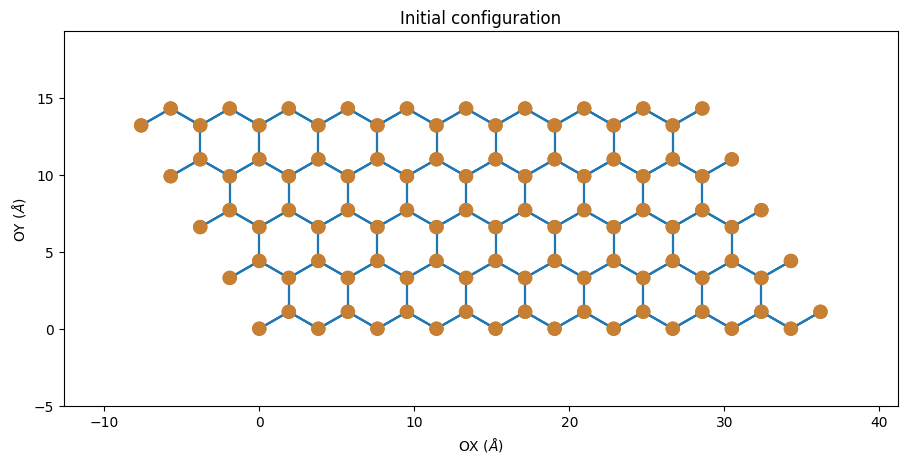

In [4]:
fig, ax = wzt.visualization.plot_atoms_2d(l0)
ax.set_title("Initial configuration")

## 1st dislocation

In [5]:
b0 = [1, 0, 0]
position0 = [5, 6, 7.5]
plane0 = (0, 0, 1)

u0 = wzt.dislocations.displace_love(
    crystal=l0,
    position=position0,
    burgers_vector=b0,
    plane=plane0,
    bv_fraction=1.0,
)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'Dislocation field (u), OXY'}, xlabel='OX ($\\AA$)', ylabel='OY ($\\AA$)'>)

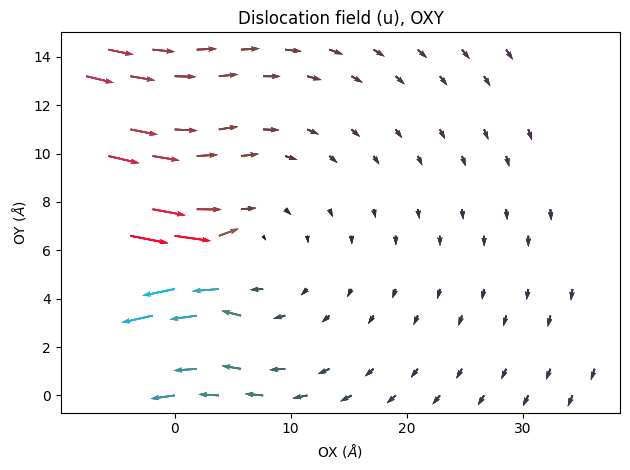

In [6]:
wzt.visualization.plot_displacement(l0, u0)

Reading bond: 593/593

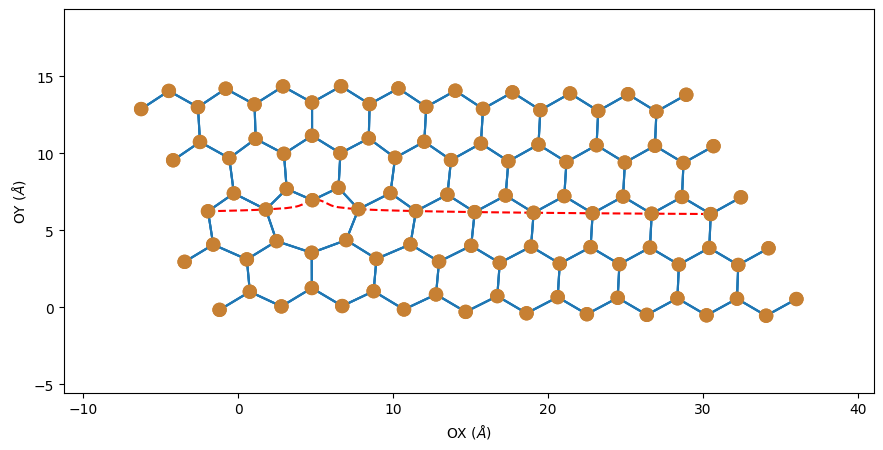

In [7]:
bv = 1.0 * l0.cell.to_cartesian_indices(b0)
l1 = l0.translate(u0)
l1 = wzt.generate.update_bonds(l1)
fig, ax = wzt.visualization.plot_atoms_2d(l1)
wzt.visualization.plot_crystal_surface_y(ax, position0, x0=-0.2, y0=0.96, xlim=(-7, 25), color="red", linestyle="dashed", bx=bv[0])

## 2nd dislocation

In [8]:
b1 = [1, 0, 0]
position1 = [24.35, 6.16, 7.5]
plane1 = (0, 0, 1)

u1 = wzt.dislocations.displace_love(
    crystal=l0,
    position=position1,
    burgers_vector=b1,
    plane=plane1,
    bv_fraction=1.0,
    tolerance=1e-5,
)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'Dislocation field (u), OXY'}, xlabel='OX ($\\AA$)', ylabel='OY ($\\AA$)'>)

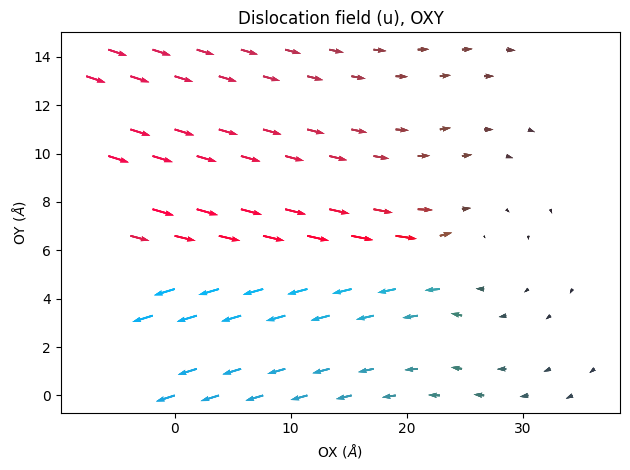

In [9]:
wzt.visualization.plot_displacement(l0, u1)

Reading bond: 593/593

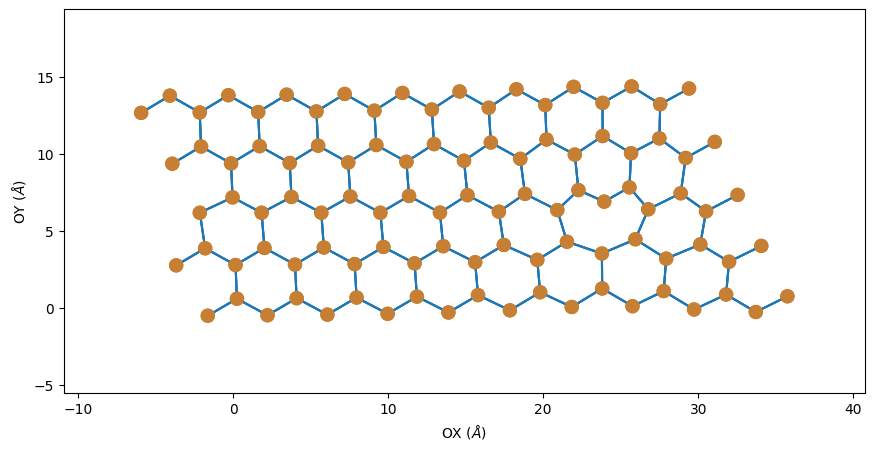

In [10]:
l01 = l0.translate(u1)
l01 = wzt.generate.update_bonds(l01)
fig, ax = wzt.visualization.plot_atoms_2d(l01)

## Linear combination of displacements

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'Dislocation field (u), OXY'}, xlabel='OX ($\\AA$)', ylabel='OY ($\\AA$)'>)

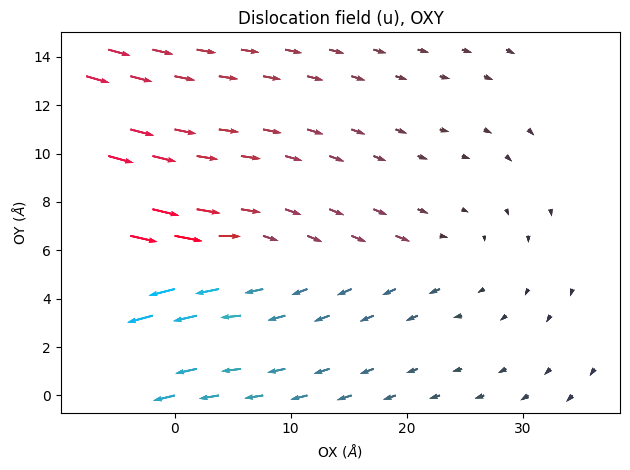

In [11]:
u01 = u0+u1
wzt.visualization.plot_displacement(l0, u01)

Reading bond: 590/590

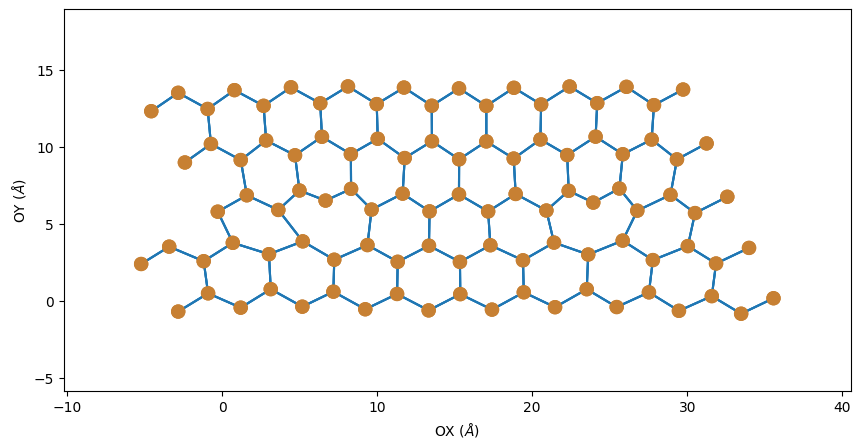

In [12]:
l2 = l0.translate(u01)
l2 = wzt.generate.update_bonds(l2)
fig, ax = wzt.visualization.plot_atoms_2d(l2)

In [13]:
# wzt.visualization.render(molecule=l2, window_size=(800, 800))